## 2. Froga praktikoa: Univariated Marginal Distribution Algorithm inplementatzen 2-objective TSPrako

<b>[Ikasle bertsioa]</b>

Bigarren froga praktiko honetan, Univariated Marginal Distribution Algorithm (UMDA) algoritmoaren helburu-anizkoitzeko bertsioa inplementatu beharko duzue bi helburuko Travelling Salesman Problem (TSP) problemaren <i>ins20a.tsp</i> instantzia optimizatzeko. Konparaketak ahalbidetzeko, Random Search algoritmo bat izango duzue eskuragarri. Frogak hiru atal nagusi izango ditu puntuagarriak direnak:

<ol>
 <li> (2pt) Bi helburuko TSParen helburu-funtzioa inplementatzea, eta soluzioentzako kodeketa egoki bat aukeratzea.
 <li> (3.5pt) UMDA algoritmoa inplementatzea TSParen soluzioak <u>ikasi eta langintzeko</u> gai izango dena.
 <li> (3.5pt) Moldatu UMDAaren aukeraketa metodoa helburu anizkoitzeko TSPa ebatzi ahal izateko. NSGA-II algoritmoaren <u>aukeraketa metodoa</u> implementatzea proposatzen dizuet.
 <li> (1pt) Irudikatu Random Search eta UMDAk lortzen dizuten paretoak plot batean. Zeinek lortzen ditu emaitza hobeagoak?
     
Adi! Algoritmo bakarra implementatu behar da.
</ol>

Orain arte egin dugun bezela, atal batzuk eginda emango dizkizuet, denbora aurrezteko. <b>"BETE HEMEN" jartzen duen lekuetan, inplementazioak gauzatu beharko dituzue. Proposatutako egitura baino beste bat nahiago baldin baduzue, posible duzue aldaketak egitea, hori bai, kontuz zein pakete/egitura berezi erabiltzen dituzuen. Gogoratu, funtzioei sarrera-irteera parametroen espezifikazioak aldatzen badiezue, gero bukaeran funtzio horiek erabiltzen diren lekuetan aldaketak egin beharko dituzuela. Frogaren ebaluaketa egiterakoan, irakasleak gai izan behar da exekuzioak egiteko. Momentu honetan importatuta dauden paketeekin posible da froga egoki egitea.</b>


### 2.1. 2-objective Travelling Salesman Problem (TSP)
Esan bezala, 2-objetive Travelling Salesman Problem (TSP)-aren helburu-funtzioa inplementatu beharko duzue. Horretarako, jarraian problemaren definizioa eta ekuazioak ematen dizkizuet:

TSPan, saltzaile bidaiari batek $n$ hiri bisitatu behar ditu. Hasierako hiri batetik abiatuko du bidaia, eta hiri bakoitza behin bisitatu beharko du. Hiri guztiak behin bisitatu ondoren, jatorrizko hirira bueltatuko da. Edozein bi hiriren artean bidaiatzeak sortzen dituen kostua eta bidaia denbora ezagutzen ditugu. Zehazki, $C=[c_{ij}]_{n\times n}$ eta $T=[t_{ij}]_{n\times n}$ matrize karratuak ematen zaizkigu, non $c_{ij}$-k eta $t_{ij}$-k $i$ hiritik $j$ hirira bidaiatzearen kostua eta denbora adierazten duten, hurrenez hurren. Gure helburua, saltzailearentzako ahalik eta ibilbide merkeena eta azkarrena duen bidea aurkitzea izango da. 

Edozein $\sigma$ soluzio bat emanda, helburu-funtzioak ondorengo erara definitzen da:
$$f_1(\sigma)=\sum_{i=1}^{n-1} c_{\sigma(i)\sigma(i+1)} + c_{\sigma(n)\sigma(1)}$$
$$f_2(\sigma)=\sum_{i=1}^{n-1} t_{\sigma(i)\sigma(i+1)} + t_{\sigma(n)\sigma(1)}$$

eGelan <i>multi_ins20a.tsp</i> instantzia aurkituko duzue. Jarraian, TSParen instantzia hori irakurtzeko instantzia duzue. Instantzia ebaluatzeko funtzioa zuk implementatu beharko duzu.

In [54]:
import numpy as np

# TSParen instantzia diskotik irakurtzeko funtzioa
def read_instance_TSP(filepath):
    fp=open(filepath)
    line=fp.readline()
    values=line.split()
    size=int(values[0])
    C = [[0]*size for _ in range(size)]
    for i in range(size):
        line=fp.readline()
        values=line.split()
        for j in range(size):
            C[i][j]=int(values[j])
    T = [[0]*size for _ in range(size)]
    for i in range(size):
        line=fp.readline()
        values=line.split()
        for j in range(size):
            T[i][j]=int(values[j])
    fp.close()
    return (size,C,T)

# Soluzio bat emanik, bere helburu-funtzioaren balioa kalkulatuko duen funtzioa.
def f(sol, instance, A):
#Koste edo denbora matrizea emanik koste funtzioa kalkulatzeko beharrezko pausuak ematen ditu
    size=instance[0]
    cost=0
    time=0
    sum = 0
    for i in range(len(sol) -1):
        sum += A[sol[i]][sol[i+1]]

    sum += A[sol[-1]][0]

    return sum
def objective_function_2TSP(solution, instance):
    size=instance[0]
    C=instance[1]
    T=instance[2]
    cost=f(solution, instance, C)
    time=f(solution, instance, T)
    # BETE HEMEN
   
    return (np.int64(cost),np.int64(time))

Baina, nola kodetuko ditugu soluzioak? Zein da soluzioen bilaketa espazioa? Zenbat soluzio daude bilaketa espazioan? Pentsatu kodeketa bat eta jarraian dagoen eremuan adibideren bat jarri, eta probatu helburu funtzioa exekutatzen. 

In [13]:
# Irakurri instantzia
instance=read_instance_TSP("multi_ins20a.tsp")

# Lehenengo ataza, erabaki TSParen soluzioak deskribatuko dituen kodeketa egokiena
#Kodeketa egokiena n tamianaako permutazio bat da. Non n bisitatu beharreko herri kopuru den eta xi posizio bakoitzean bisitatutako i garren herriaren gordeko den.
#Adibidez
#n = 3 bada,
#X = [1, 2, 3]
#X = [3, 1, 2] ...

#Ausazko soluzio bat sortzeko
n = 20 #
solution = np.random.permutation(20)
# Ebaluatu goiko soluzioa
result=objective_function_2TSP(solution, instance)
print("Proposatutako soluzioaren helburu-funtzioaen balioak",result, "dira.")

Proposatutako soluzioaren helburu-funtzioaen balioak (975, 791) dira.


### 2.2. Random Search algoritmoa

Atal honetan, <i>Random Search</i> edo ausazko bilaketa algoritmoa inplementatuta ematen dizuet. Helburua, UMDA ebaluatu ahal izateko konparatzeko zerbait edukitzea. Ziurtatu funtzionatzen dizuela, eta irudi batean lortutako soluzio multzoa aurkezten duela.

[814, 559, 455, 862, 828, 575, 625]


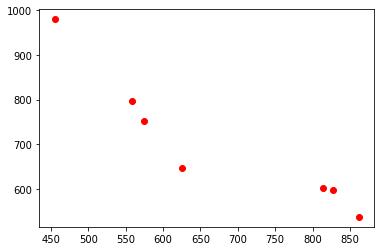

Best fitness solution  [(814, 601), (559, 796), (455, 980), (862, 537), (828, 598), (575, 751), (625, 646)] [(14, 0, 8, 13, 9, 5, 17, 18, 19, 1, 15, 3, 12, 7, 6, 4, 10, 16, 2, 11), (6, 15, 12, 8, 10, 14, 3, 16, 17, 13, 7, 0, 9, 18, 1, 2, 4, 5, 19, 11), (0, 8, 14, 12, 5, 13, 15, 6, 9, 3, 17, 7, 4, 11, 1, 18, 2, 16, 19, 10), (11, 14, 8, 13, 5, 0, 19, 18, 3, 17, 7, 2, 16, 10, 15, 9, 1, 12, 4, 6), (5, 4, 8, 15, 9, 18, 3, 0, 6, 13, 12, 17, 2, 1, 19, 16, 14, 11, 7, 10), (9, 17, 2, 16, 13, 1, 18, 3, 5, 14, 10, 6, 15, 8, 7, 11, 19, 12, 4, 0), (16, 0, 7, 2, 1, 9, 3, 5, 4, 8, 10, 18, 6, 15, 14, 19, 12, 13, 17, 11)]
Execution time:  0.4225618839263916


In [30]:
import random
import more_itertools as mit
import time as tm
import numpy as np
import matplotlib.pyplot as plt

def InsertInPareto(pareto_fitness,fitnesses):
    for i in range(len(pareto_fitness)):
        if (fitnesses[0]>pareto_fitness[i][0] and fitnesses[1]>=pareto_fitness[i][1]) or (fitnesses[0]>=pareto_fitness[i][0] and fitnesses[1]>pareto_fitness[i][1]):
            return False
    return True

def CleanDominates(pareto_fitness,pareto_solutions,fitnesses):
    size=len(pareto_fitness)
    i=0
    while (size>=1 and i<size):
        if (fitnesses[0]<pareto_fitness[i][0] and fitnesses[1]<=pareto_fitness[i][1]) or (fitnesses[0]<=pareto_fitness[i][0] and fitnesses[1]<pareto_fitness[i][1]):
            pareto_fitness.pop(i)
            pareto_solutions.pop(i)
            size=size-1
        else:
            i=i+1
    return (pareto_fitness, pareto_solutions)

# Instantzia bat eta soluzio kopuru bat emanik ausazko bilaketa inplementatzen duen funtzioa. 
# Soluzioa eta bere fitness balioa itzuliko ditu
def random_search(instance, num_solutions):
    size=instance[0]
    pareto_solutions=list()
    pareto_fitness=list()
    best_solution=list(range(size))
    best_fitness=objective_function_2TSP(best_solution,instance)
    pareto_solutions.append(best_solution)
    pareto_fitness.append(best_fitness)
    for i in range(num_solutions-1):
        sol=mit.random_permutation(range(size))
        fitnesses=objective_function_2TSP(sol,instance)
        if (InsertInPareto(pareto_fitness,fitnesses)==True):
            (pareto_fitness,pareto_solutions)= CleanDominates(pareto_fitness,pareto_solutions,fitnesses)
            pareto_solutions.append(sol)
            pareto_fitness.append(fitnesses)
    return (pareto_fitness, pareto_solutions)

#Instantzia kargatu
instance=read_instance_TSP("multi_ins20a.tsp")

# Algoritmoa exekutatu eta kalkulatu konputorako denborak
start=tm.time()
(fitnesses,solutions)=random_search(instance,10000)
end=tm.time()
x = []
y = []
for i in fitnesses:
  x.append(i[0])
  y.append(i[1])
print(x)
plt.scatter(x, y, c = "r")
plt.show()

# Inprimatu balioak pantailan.
print("Best fitness solution ",fitnesses, solutions)
print("Execution time: ",end-start)

### 2.3. Univariated Marginal Distribution Algorithm (UMDA)

Atal honetan UMDA algoritmoa inplementatu beharko duzu. Gogoratuko zaretenez, algoritmo hau Estimation of Distribution Algorithms (EDA) motako algoritmoa da. Hainbat parametro izango ditu sarrera bezela:
<ul>
    <li> <i>instance</i>: bi elemantu izango ditu. 0 posizioan, matrizearen tamaina $n$, 1 posizioan, $C$ matrizea eta 2 posizioan, $T$ matrizea.
    <li> <i>max_evals</i>: ebaluatu ditzazkegun soluzio kopurua.
    <li> <i>pop_size</i>: populazioko soluzio kopurua.
    <li> <i>sel_size</i>: populaziotik aukeratuko ditugun soluzio kopurua.
    <li> <i>off_size</i>: laginduko diren soluzio kopurua iterazio bakoitzean.
</ul>

Ondorengo espezifikazioak dituen UMDA inplementatu beharko duzue.

<ul>
    <li> Algoritmo iteratibo bat da, eta iterazio bakoitzean duen populazioa hobetzeko eragiketa batzuk egingo ditu
    <li> <i>Selection</i> eragiketan, <i>sel_size</i> soluzio onenak aukeratuko ditu populaziotik. <b>Adi! kasu honetan problemak, bi helburu ditu, eta beraz, NSGA-II algoritmoak duen aukeraketa berdina erabiliko dugu. Ez da beharrezkoa Crowding Distance-a implementatzea, baina bai lehenengo partea.</b>.
    <li> <i>Learning</i> eragiketan, aurreko faseko soluzio onenak erabilita, eredu probabilistikoaren parametroak ikasi beharko ditu.
    <li> <i>Sampling</i> eragiketan, ikasitako eredutik abiatuta, soluzio berriak lagindu eta ebaluatu beharko ditugu. Adi! ziurtatu sortzen diren soluzioek kodeketa errespetatzen dutela.
    <li> <i>Update</i> eragiketan, langindutako eta uneko soluzioan genituen soluzioen artetik <i>pop_size</i> onenak gordeko ditugu, eta gainerakoak ezabatu.
</ul>  

Gogoratu, UMDAren prozesu guzti honetan, soluzioen ebaluazio kopuru zehatz bat egin ahal izango dugula gehienez. Beraz, hori kontrolatu behar den gauza da, batez ere ebaluazio kopuru maximora hurbiltzen garenean.

In [ ]:
import numpy as np
import copy

In [213]:
# Instantzia bat, ebaluazio kopuru maximoa, eta beste hiru parametro emanik UMDA bat exekutatuko du.
# Soluzioa eta bere helburu-funtzioaren balioa itzuliko ditu.

def dominates(i, j):
#i soluzioak j dominatzen duen ala ez bueltatzeko kodea
  fi = objective_function_2TSP(i, instance)
  fj  =objective_function_2TSP(j, instance)

  return fi[0]<=fj[0] and fi[1] <= fj[1] and (fi[0]<fj[0] or fi[1] < fj[1])#bi helburu funtzio izanik, i-k j dominatzeko baldintza

def getf(pop):
#Pareto fronteak kalkulatzeko funtzioa
  evals = 0
  population = [i for i in range(len(pop))]
  F = []
  #Balio guztiak pareto  batean sartu arte, balio bakoitzak ea beste guztien dominantea den ikusten da.
  while len(population) > 0:
    act = [] #Uneko paretoko balioak gordetzeko lista
    for idx, i in enumerate(population): #Denak denekin konparatu
      dominant  =True #Hasieran dominantea izango da
      for idj, j in enumerate(population):
        if idx != idj:
          if dominates(pop[j], pop[i]): #j eta i ezberdinak badira eta j-k i dominatze badu, i ez da dominantea eta ez da besste j-rik bilatu behar.
            dominant = False
            break
          evals += 2 #Dominatzen duen ala ez jakiteko 2 ebaluazio behar dira
      if dominant: #i-k ez badu dominanterik, balioa uneko paretoan sartu eta konparaketen populaziotik atera.
        act.append(pop[i])
        population.remove(i) 

    F.append(act) #Uneko paretoan paretoen listan sartu
  return F, evals

def hasieraketa(pop_size, instance):
#Hasieraketa operadorea 
  solution = [np.random.permutation(instance[0]) for i in range(pop_size)]
  return solution

def update(new, old, num):
  #update operadorea
  lag = sorted(np.concatenate((new, old)), key=lambda x: objective_function_2TSP(x, instance)) #Populazio guztia objective_function_2TSP txikienengatik ordenatu eta lehenego num hartu
  return lag[:num]
def selection(pop, sel_size):
  #Selection opeadorea
  new = []
  F, evals = getf(pop)
  id = 0
  while len(new) < sel_size:
    for i in F[id]:
      new.append(i)
  new = new[0:sel_size]
  return new, evals

def learning(pop):
  #Probabilitate banaketa kalulatzeko aurreko populazioko posizio bakoitzean herri bakoitzak duen frekuentzia erabiliko dut.
  #Honek limitean populazio berriko balio bakoitzean aurreko populazioko balioen Bataz bestekoa lortzea ekarriko du. UMDA algoritmoa jarraituz
  size = len(pop[0])
  distribution = np.zeros((size, size))
  for i in pop:
    for idj, j in enumerate(i):
      distribution[idj][j] += 1
  distribution = distribution / len(pop)
  return distribution


def sanpling(distribution, kop, pop):
#Sanpling operadorea. Ez da inplementatzeko modurik efizienteena
  res =[]
  konta = distribution * len(pop) # Probabiliteetatik frekuentziak kalkulatu.
  for _ in range(kop):
    dist = distribution.copy()
    kont = konta.copy()
    act = []

    for i in range(len(dist)):
      p = dist[i]
      num = np.random.choice(np.arange(0, len(dist)), 1, p = p) # 0 tik instance[0]-rako elementu bat hartu distribuzioaren arabera.
      act.append(int(num))
      #Permutazio bat denez, sanpleatu ondoren probabilitateak berkalkulatu behar dira.
      kont[i][num] = 0 #Jadanik hartu den zenbakiaren frekuentzia 0 jarri berriz ere ez auekeratzeko
      dist[i] = kont[i] / sum(dist[i]) #Berriz ere kalkulatu distribuzioa
    res.append(act)
  return res


def umda(instance, max_evals, pop_size, sel_size, off_size):
    # BETE HEMEN 
    pop = hasieraketa(pop_size, instance)
    evals = 0
    while evals <= max_evals:
      pop, evals_act = selection(pop, sel_size)
      distribution = learning(pop)
      new_pop = sanpling(distribution, off_size, pop)
      pop = update(new_pop, pop, pop_size)
      evals += evals_act

    last = pop[0:10] #10 onenak hartzen ditut random search algorimoarekin konparatzeko
    objectives = []
    for i in last:
      objectives.append(objective_function_2TSP(i, instance))
    
    return objectives, pop[0:100]

#Instantzia kargatu
instance=read_instance_TSP("multi_ins20a.tsp")

# Algoritmoa exekutatu eta kalkulatu konputorako denborak
start=tm.time()
(fitness,sol)=umda(instance,1000,50,25,50)
end=tm.time()

# Inprimatu balioak pantailan.
print("Best fitness solution ",fitness[0], sol[0])
print("Execution time: ",end-start)

50
Best fitness solution  (499, 791) [ 9 18 10 16  0  3 15 12 15  1  9 12 12  7  7  6 11  8  8  0]
Execution time:  0.24729347229003906


### 2.4. Konparatu Random Search eta UMDAren emaitzak

Atal honetan, Random Search-aren emaitzak UMDArenarekin konparatzea eskatzen zaizu. Horretarako, <i>scatter plot</i> edo puntuen plot bat, egitea gomendatzen dizut. Saiatu Random Search-aren soluzioak kolore batez, eta UMDA-arenak beste kolore batez irudikatzen.

In [214]:
# Implementatu hemen emaitzak irudikatzeko grafikoaren kodea.
import matplotlib.pyplot as plt
def irudikatu(max_evals):
  #Irudikatzeko funtzioa
  start=tm.time()
  (fitnesses,solutions)=random_search(instance,max_evals)
  end=tm.time()
  x = []
  y = []
  for i in fitnesses:
    x.append(i[0])
    y.append(i[1])
  plt.scatter(x, y, c = "r")
  fitnesses,solutions =umda(instance,max_evals,50,25,50)
  print(fitnesses)
  x = []
  y = []
  for i in fitnesses:
    x.append(i[0])
    y.append(i[1])
  plt.scatter(x, y, c = "b", label= "a")

  plt.xlabel("kostua")
  plt.ylabel("Denbora")

  plt.show()


Irudiak ikusirik, zein ondorio ateratzen dugun algoritmo bakoitzaren errendimenduaren inguruan? Azaldu ahalik eta zabalen.



# Ondorioen azalpena.

Espero ziren erantzunak ikusten dira exekuzioetan. Gehienetan, UMDA algoritmoak random search algoritmoak baino erantzun hobeak ematen dituela ikusi daiteke baina hala ere erantzunak aldatu egiten dira bi algoritmoen hiperparametroak aldatuz. Horrela izanik, ebaluazio maximoa aldatu ahala bi algoritmoen erantzunak aztertuko ditut.

1. Ebaluzio maximo oso gutxi(50): kasu extremua da hau eta bi algoritmoek, espero zen bezala, erantzun oso parekoak ematen dituela ikusten da. Izan ere, UMDA algoritmoren hasierakop populazioa ausaz hasten da eta oso ebaluazio gutxi ditu algoritmoak hobetu ahal izateko.

50
[(682, 1051), (690, 1122), (700, 968), (706, 1068), (721, 836), (721, 836), (721, 836), (721, 836), (721, 836), (721, 836)]


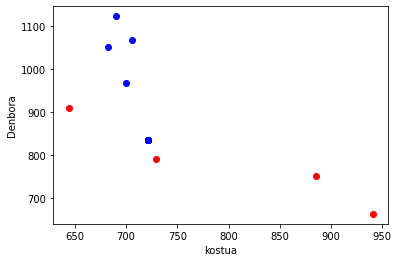

In [219]:
irudikatu(50)

2. 2000 ebaluaziorekin: Ebaluazio denborak txikiak izanda ere, aurreko experimentuarekiko alderapenak ikusten dira hemen. Izan ere, kasu gehienetan, 2000 ebaluaziorekin random search algoritmoak UMDA algoritmoak baino erantzun hobeagoak ematen dituela ikusten da. UMDA-rentzat ebaluazio kopurua oraindik ere txikia delako izan daiteke. Horren froga izan daiteke exekuzio batzuetan UMDA-k balio askoz hobeak lortzen dituela. Hori azaldu genezake esanez algoritmoak ez dituela ebaluazio nahiko erantzunak konsistenteki hobetzeko eta oraindik garrantzi handia hartzen du auzasko hasieraketak. 

Horregatik, hasieraketa horrek balio onak ematen ditunean NSGA random search baino balio hobeak ematen dituela ikusten da.

50
[(479, 1013), (548, 1257), (620, 781), (620, 781), (620, 781), (620, 781), (625, 1178), (625, 1178), (625, 1178), (653, 794)]


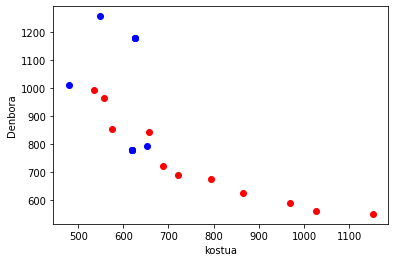

In [220]:
irudikatu(2000)

20000 ebaluaziorekin: UMDA algorimoaren kapazidadea ikusten da froga hauetan, konsistenteki hobetzen ditu eta random search-en emaitzak. 

50
50
50
50
50
50
[(510, 672), (510, 672), (510, 672), (510, 672), (525, 615), (528, 677), (570, 665), (570, 773), (570, 773), (570, 773)]


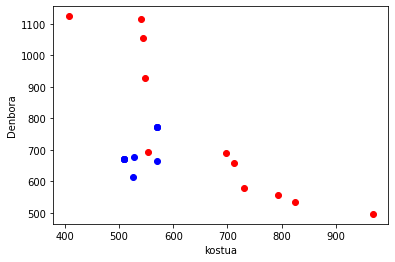

In [221]:
irudikatu(20000)

Laburbilduz, frogatzea lortu dugu nola ebaluazio maximo kopurua handitzean UMDA algoritmoak random search baino emaitza hobeak ematen dituela. Hau da, hasieraketako emaitzak hobetzeko ebaluazio nahikoa emanik, erantzun hobeak esperoko ditugu UMDA algoritmotik. 

Azkenik, aipatu beharra dago ere UMDA algoritmoak erantzun hobeak emateko gai bada ere, random search algoritmoak baino konputazio denbora gehiago behar dituela. Hala ere, denbora hauek oso luzeak ez direla ikusi da.